<center><h1>Fundamentos Data Science parte 1</h1><center>
    Autor: Walther Becks

<h2>Desafío 1: Determinantes del ingreso</h2>

Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas
socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza
extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa
de las Naciones Unidas para el Desarrollo.
Le encomiendan el desarrollo de un **modelo predictivo** sobre la **probabilidad que un
individuo presente salarios por sobre o bajo los 50.000 dólares anuales**, en base a una serie
de atributos sociodemográficos.

**Datos Asociados: income-db.csv**

## Hito 1: Análisis Preliminar del problema

* Se pide desarrollar un modelo predictivo para determinar la probabilidad de ocurrencia de mi Variable Dependiente, que los individuos entren en cierto criterio de rango salarial.
* La variable del vector objetivo es categórica binarizada.
* Nos solicitan la ocurrencia de esta, esto hace que el problema sea de **regresión logística**.
* Prepocesamiento y limpieza de datos:
    * Para ello se procederá a reemplazar los perdidos como '?' y transformarlos a nulos
    * Revisar la estructura de datos, con enfásis en que las variables númericas no sean de tipo texto.
    * Análisis exploratorio de datos perdidos para evaluar el uso de variables y columnas
    * Las métricas de desempeño son:
        * Modelo Machine Learning:
            * F1:
            * Precission:
            * Recall:
            * Accuracy:
            * AUC:
        * Para el modelo Econometrico:
            * Log Verosimilitud:
* Una vez lista la base se procederá al análisis exploratorio de variable
* Una vez listo el análisis exploratorio de variables se procederá con la **Modelación descriptiva** para definir los principales determinantes de la variable dependiente.
* Una vez lista la modelación descriptiva, se procederá con la **Modelación predictiva**, donde se buscará una solución analítica que aumente las metricas de desempeño

**Librerías a utilizar:** 

1. pandas == 1.2.0
2. numpy == 1.20.3
3. scipy == 1.7.3  
4. matplotlib == 3.0.3
5. seaborn == 0.11.2 
6. statsmodels == 0.13.2
7. conda == 4.8.3
8. python == 3.7.3
9. missingno == 0.5.1

-----------

## Hito 2:

### Aspectos computacionales:
**Importe de librerías**

In [130]:
import pandas as pd # Librería de manipulación de datos
import numpy as np # Librería de manipulación de datos
import matplotlib.pyplot as plt # Librería de visualización de datos y gráficos
import seaborn as sns # Librería de visualización de datos y gráficos
sns.set_style('darkgrid') # Parte de la librería de seaborn, que permite un estilo distinto al default en visualización
import missingno # Librería de visualización de falta de datos para análisis exploratorio
import warnings # Librería para ignorar las advertencias que arroja Python por cambio de versiones y ver un código más claro
warnings.filterwarnings('ignore') # Importe de la opción de ignorar las advertencias.

# Clasificación desde la Econometría
import statsmodels.api as sm # Librería que permite funciones y clases para la estimación de múltiples modelos estadísticos, como también pruebas estadisticas y exploración estadística.
import statsmodels.formula.api as smf # Librería que permite la creación del modelo en base a una formula y Data Frame.
# Clasificación desde el Machine Learning
from sklearn.linear_model import LogisticRegression # Importe de librería de herramientas de predicción de análisis de datos para modelos lineales y regresión logística
from sklearn.linear_model import LinearRegression # Importe de librería de herramientas de predicción de análisis de datos para modelos lineales y regresión logística
from sklearn.model_selection import train_test_split # Librería para dividir la muestra entre entrenamiento y prueba
from sklearn.metrics import mean_squared_error, r2_score # Librería que importa herramientas de análisis de error cuadratico y error cuadratico medio
from sklearn.preprocessing import StandardScaler # Librería de estandarización de variables de muestras de prueba y entrenamiento usado para Machine Learning
from sklearn.metrics import classification_report, roc_curve, confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score # Librerías de Machine Learning utilizadas para medir la efectividad de los modelos.

import functions # Funciones creadas ad-hoc para la realización de este examen. 
plt.style.use('seaborn') # Gráficos estilo seaborn
plt.rcParams['figure.figsize'] = (10,6) # Ampliar las figuras gráficas
plt.rcParams["figure.dpi"] = 200 # Mejora de calidad de los gráficos
pd.set_option('display.max_rows', None) # Opción que permite ver todas las filas al cargar un Data Frame
pd.set_option('display.max_columns', None) # Opción que permite ver todas las columnas de un Data Frame

<hr>

### Importe de datos

In [3]:
df = pd.read_csv('income-db.csv')
print(f"Tenemos {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()

Tenemos 48842 filas y 15 columnas


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<hr>

### Limpieza de base de datos

#### Valores nulos

In [4]:
df = df.replace(to_replace='?',value= np.nan)
df.apply(lambda x: f"{round((x[x.isna()].shape[0]/x.shape[0])*100, 2)}%").sort_values(ascending = False).to_frame().rename(columns = {0:'% nulos'})

,% nulos
occupation,5.75%
workclass,5.73%
native-country,1.75%
age,0.0%
fnlwgt,0.0%
education,0.0%
educational-num,0.0%
marital-status,0.0%
relationship,0.0%
race,0.0%


<AxesSubplot:>

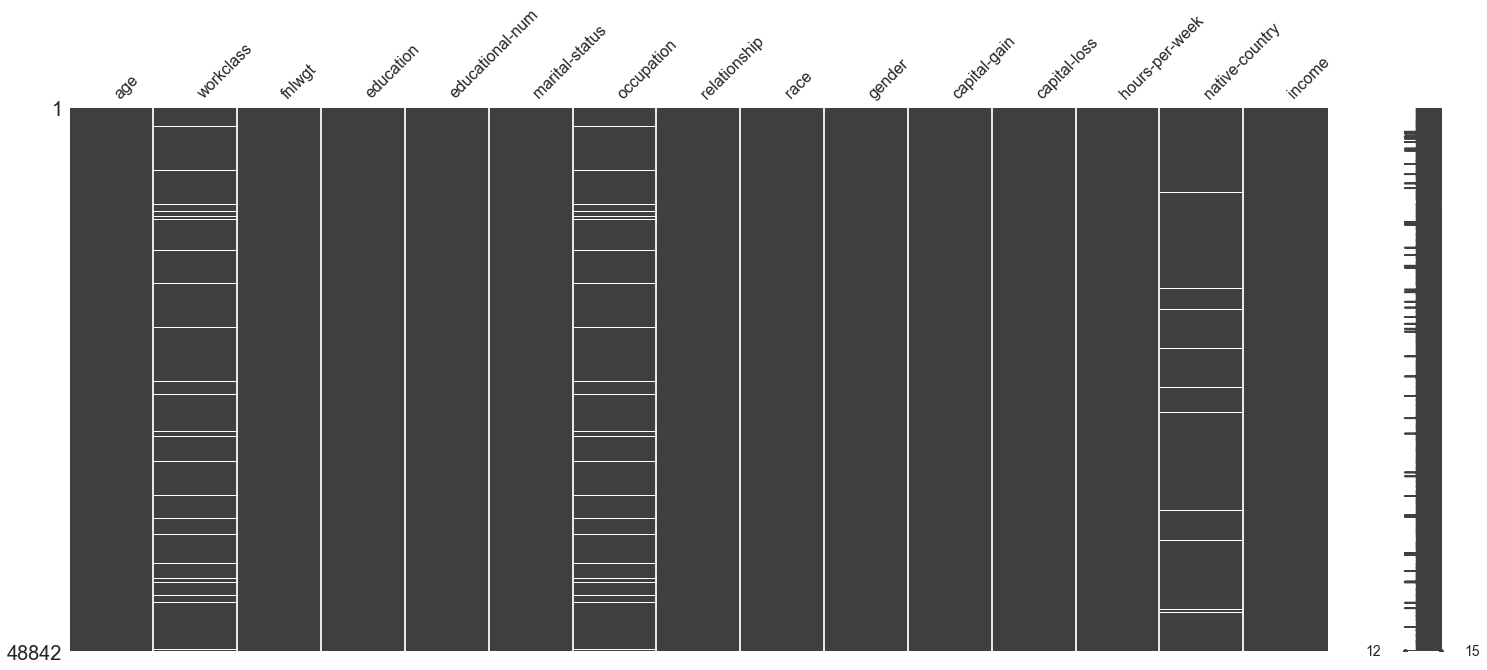

In [5]:
missingno.matrix(df)

<hr>

In [6]:
df_droped_na = df.dropna()

Se procedió a limpiar la base de valores nulos eliminandolos, debido a que el porcentaje de datos nulos no es significativa, con lo que se **consiguió conservar un 93% de los datos**, se perdieron 3620 filas y **se mantuvieron 45222**. Podemos observar que las columnas **occupation, workclass y native-country son las únicas columnas con datos faltantes con un 5.75%, 5.73% y 1.75% respectivamente.**

#### Tipo de datos

In [7]:
df_droped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


* Podemos observar que tenemos 2 grupos de tipos de datos:
    * Continuo int64:
        * Age
        * Fnlwgt
        * Educational-num
        * Capital-gain
        * Capital-loss
        * Hours-per-week
    * Categórico del tipo object:
        * Workclass
        * Education
        * Marital-status
        * Occupation
        * Relationship
        * Race
        * Gender
        * Native-country
        * Income

In [8]:
df_droped_na.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
28315,35,Private,228493,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,48,United-States,<=50K
37403,28,Private,71733,Some-college,10,Separated,Other-service,Unmarried,White,Female,0,0,15,United-States,<=50K
43463,58,Federal-gov,139290,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
47742,49,Private,193047,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,>50K
12183,39,Self-emp-not-inc,497525,10th,6,Separated,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,<=50K


* **Podemos observar que luego de la limpieza de valores faltantes, al analizar el tipo de datos tenemos solo int64 para los valores numéricos continuos, y object para tipo string, de cualquier forma procederemos a analizar los valores únicos de las variables por la búsqueda de algún valor fuera de lugar o mal escrito o duplicadamente mal escrito**

In [9]:
for i in df_droped_na.select_dtypes('O'):
    print(i)
    print(df_droped_na[i].unique())
    print("\n")

workclass
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']


marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']


relationship
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


race
['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']


gender
['Male' 'Female']


native-country
['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'H

### Análisis exploratorio inicial

#### Variables numéricas continuas

In [10]:
df_droped_na.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Vvariables no numéricas

In [11]:
df_droped_na.describe(include=object)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


### Recodificación de las variables

1. Utilizando el importe de functions, recodificaremos y binarizaremos las variables
2. Normalizaremos las varibles numéricas (excepto las binarias).

In [12]:
df_recodificacion = functions.recodificaciones(df_droped_na)
df_bin = pd.get_dummies(df_recodificacion, drop_first = True)
df_norm = df_bin.select_dtypes('int64').apply(lambda x: (x - x.mean())/x.std()).join(df_bin.select_dtypes('uint8'))
print(f"**De las {df_recodificacion.shape[1]} columnas originales, se procedió a agregar {df_bin.shape[1]-df_recodificacion.shape[1]} columnas binarias, dejando un total {df_bin.shape[1]} columnas**")

df_norm.head()

**De las 15 columnas originales, se procedió a agregar 18 columnas binarias, dejando un total 33 columnas**


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K,collars_others,collars_white-collar,workclass_recod_private,workclass_recod_self-employed,workclass_recod_state-level-gov,workclass_recod_unemployed,educ_recod_elementary-school,educ_recod_high-school,educ_recod_preschool,educ_recod_university,civstatus_married,civstatus_never-married,civstatus_separated,civstatus_widowed,region_asia,region_europa
0,-1.024972,0.350886,-1.221545,-0.146732,-0.218778,-0.078119,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,-0.041455,-0.945868,-0.438117,-0.146732,-0.218778,0.754693,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,-0.798006,1.393576,0.737026,-0.146732,-0.218778,-0.078119,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0.412476,-0.278417,-0.046402,0.877457,-0.218778,-0.078119,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,-0.344075,0.084801,-1.613260,-0.146732,-0.218778,-0.910931,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [13]:
df_norm.columns = [i.replace('-','_').replace('>', 'more_than_') for i in df_norm.columns]
df_bin.columns = [i.replace('-','_').replace('>', 'more_than_') for i in df_norm.columns]
df_recodificacion['income_bin'] = np.where(df_recodificacion['income']=='>50K',1,0)
print("Finalmente se procedió a reemplazar los guiones y signos no compatibles con las librerías de machine learning para el set de datos binarizado(df_bin) y el estandarizado (df_norm), junto con crear la columna binarizada del vector objetivo para el set de datos inicial df_recodificacion")
df_norm.columns.to_list()

Finalmente se procedió a reemplazar los guiones y signos no compatibles con las librerías de machine learning para el set de datos binarizado(df_bin) y el estandarizado (df_norm), junto con crear la columna binarizada del vector objetivo para el set de datos inicial df_recodificacion


['age',
 'fnlwgt',
 'educational_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'relationship_Not_in_family',
 'relationship_Other_relative',
 'relationship_Own_child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_Asian_Pac_Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'gender_Male',
 'income_more_than_50K',
 'collars_others',
 'collars_white_collar',
 'workclass_recod_private',
 'workclass_recod_self_employed',
 'workclass_recod_state_level_gov',
 'workclass_recod_unemployed',
 'educ_recod_elementary_school',
 'educ_recod_high_school',
 'educ_recod_preschool',
 'educ_recod_university',
 'civstatus_married',
 'civstatus_never_married',
 'civstatus_separated',
 'civstatus_widowed',
 'region_asia',
 'region_europa']

In [14]:
df_recodificacion.head()

,age,fnlwgt,educational-num,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income,collars,workclass_recod,educ_recod,civstatus,region,income_bin
0,25,226802,7,Own-child,Black,Male,0,0,40,<=50K,blue-collar,private,high-school,never-married,america,0
1,38,89814,9,Husband,White,Male,0,0,50,<=50K,blue-collar,private,high-school,married,america,0
2,28,336951,12,Husband,White,Male,0,0,40,>50K,blue-collar,state-level-gov,college,married,america,1
3,44,160323,10,Husband,Black,Male,7688,0,40,>50K,blue-collar,private,college,married,america,1
5,34,198693,6,Not-in-family,White,Male,0,0,30,<=50K,others,private,high-school,never-married,america,0


## Inspección de variables

### Variables númericas

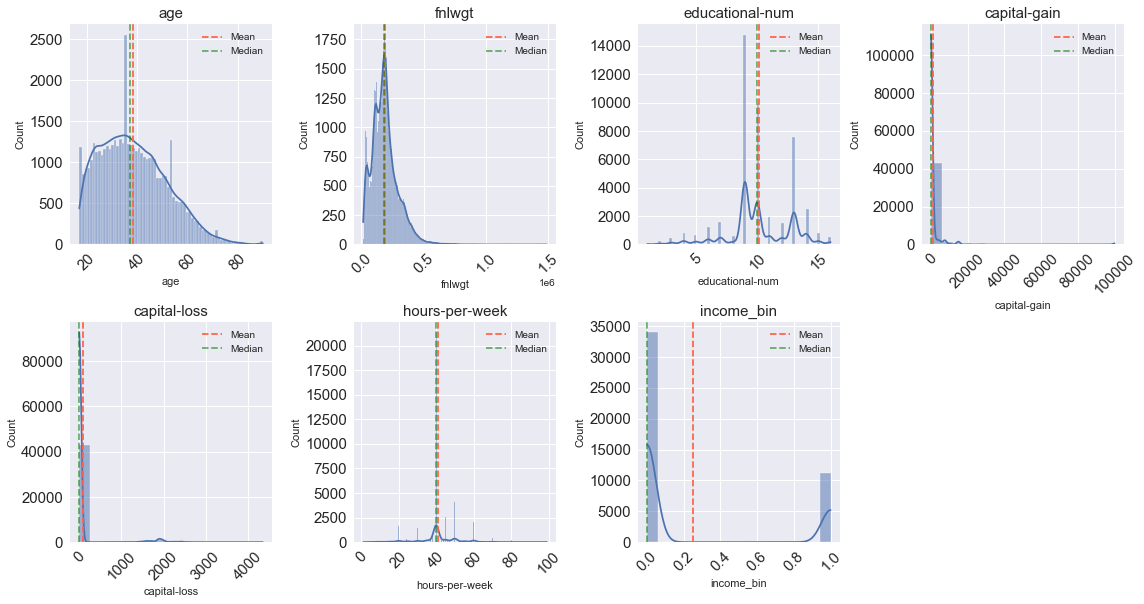

In [15]:
df_tmp = df_recodificacion.copy()
n = df_tmp.select_dtypes(np.number).shape[1] if df_tmp.select_dtypes(np.number).shape[1]%2 == 0 else df_tmp.select_dtypes(np.number).shape[1] + 1
filas, columnas= round(n/2), round(n/2)

plt.figure(figsize=(2*n, filas*columnas))
for i, (colname, serie) in enumerate(df_tmp.select_dtypes(np.number).iteritems()):
    plt.subplot(filas,columnas, i+1)
    plt.title(colname, fontsize=15)
    sns.histplot(serie,kde=True)
    plt.axvline(serie.mean(),color='tomato', linestyle = '--',label=f'Mean')
    plt.axvline(serie.median(),color='green',  linestyle = '--',label=f'Median',alpha=0.6)
    plt.xticks(rotation=45,fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    
plt.tight_layout()

### Variables categóricas

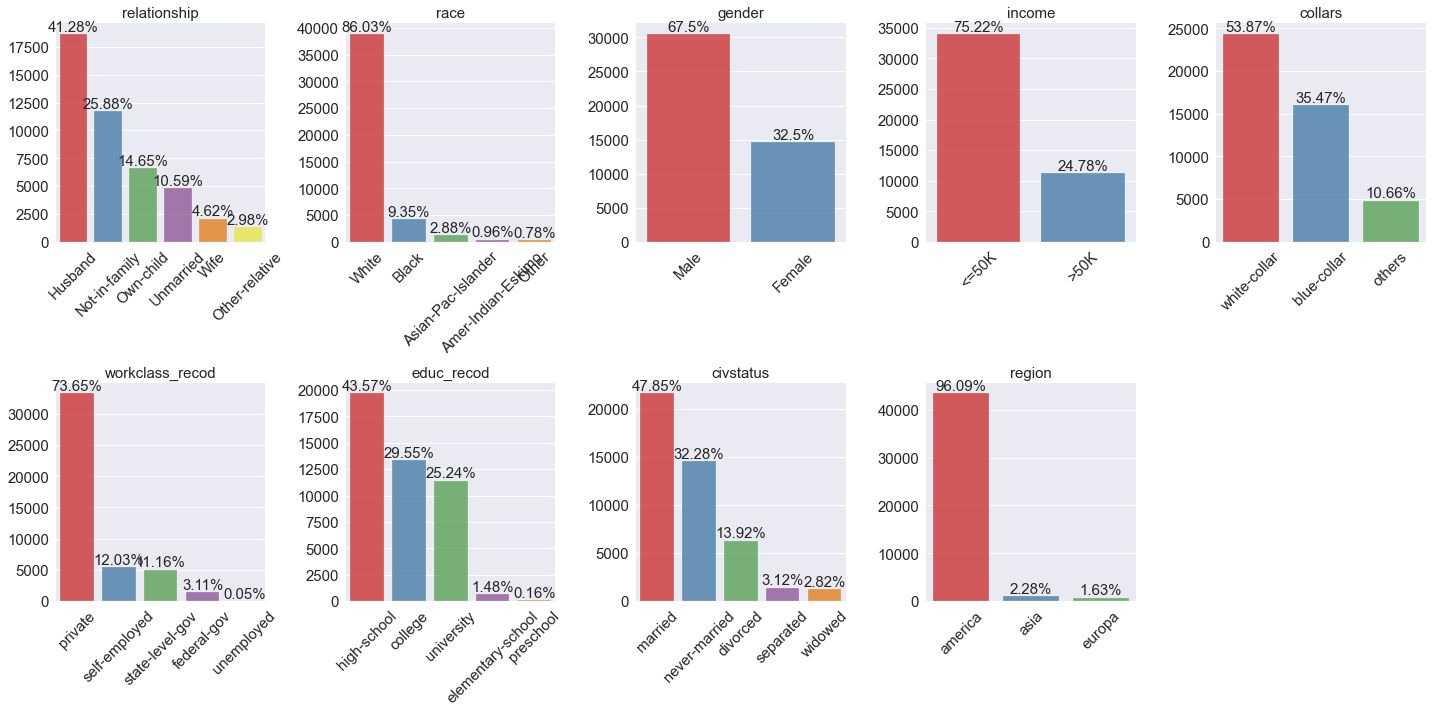

In [16]:
df_tmp = df_recodificacion.copy()
n = df_tmp.select_dtypes('object').shape[1] if df_tmp.select_dtypes('object').shape[1]%2 == 0 else df_tmp.select_dtypes('object').shape[1] + 1

divisores = lambda n : [i for i in range(1, int(n/2) +1) if n % i ==0 and i >1]
filas, columnas= divisores(n)[0], divisores(n)[1]

plt.figure(figsize=(2*n, filas*columnas))
for i, (colname, serie) in enumerate(df_tmp.select_dtypes('object').iteritems()):
    plt.subplot(filas,columnas, i+1)
    plt.title(colname, fontsize=15)
    ax = sns.barplot(serie.value_counts().index, serie.value_counts().values,color='b',alpha=.8,palette='Set1')
    
    ax.bar_label(ax.containers[0], labels=[f'{round(i*100,2):}%' for i in serie.value_counts('%').values], fontsize=15)
    
    plt.xticks(rotation=45,fontsize=15)
    plt.yticks(fontsize=15)
    
plt.tight_layout()

- Podemos observar que la muestra está sesgada por una predominancia de observaciones de:
    * Continente Americano 96%
    * Sector privado 74%
    * Raza blanca 86%
- Finalmente, el vector objetivo muestra una pre ponderancia inclinandose por personas que ganan menos de 50 mil USD (75%) y mayoritariamente hombres con un 67.5%

----------------

**Se procederá a calcular un histograma de las variables categóricas en base a la variable objetivo, siendo 1 = >50 K USD**

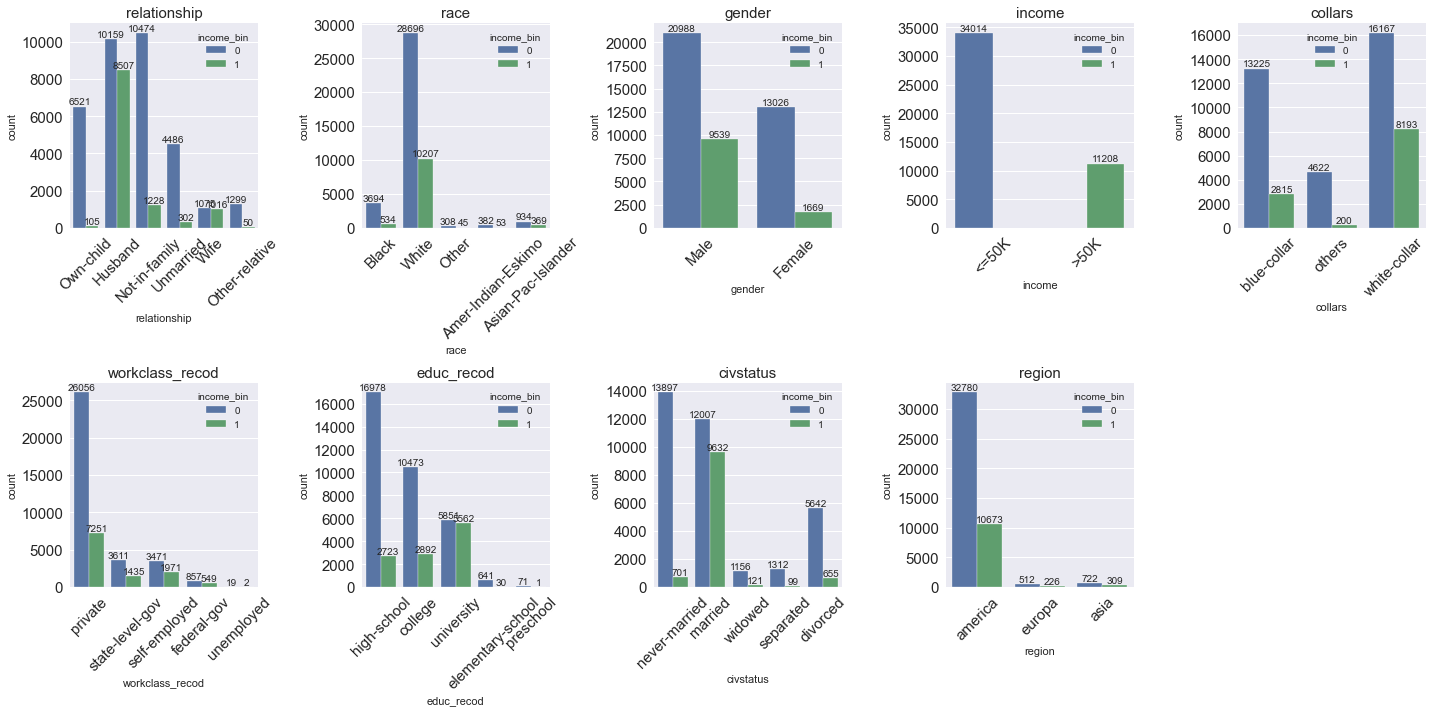

In [18]:
df_tmp = df_recodificacion.copy()
n = df_tmp.select_dtypes('object').shape[1] if df_tmp.select_dtypes('object').shape[1]%2 == 0 else df_tmp.select_dtypes('object').shape[1] + 1

divisores = lambda n : [i for i in range(1, int(n/2) +1) if n % i ==0 and i >1]
filas, columnas= divisores(n)[0], divisores(n)[1]

plt.figure(figsize=(2*n, filas*columnas))
for i, (colname, serie) in enumerate(df_tmp.select_dtypes('object').iteritems()):
    plt.subplot(filas,columnas, i+1)
    plt.title(colname, fontsize=15)
    
    ax = sns.countplot(x=colname,hue='income_bin',data=df_tmp)
    for container in ax.containers:
        ax.bar_label(container)#,axlabels=[f'{round(i*100,2):}%' for i in serie.value_counts('%').values], fontsize=15)
    
    plt.xticks(rotation=45,fontsize=15)
    plt.yticks(fontsize=15)
    
plt.tight_layout()

**Podemos observar que para la variable objetivo = 1, hay una desproporción substancial en comparación a hombres y casados. Esto lo veremos junto a otros 2 graficos complementa
rios**

**Se puede apreciar la diferencia substancial de casos de diferencia de genero. Mostrando que el 31.25% de los hombres en la muestra ganan sobre 50k USD, en cambio tan solo un 11.36% de las mujeres logran esto.**

**Podemos observar que en su gran mayoría el vector objetivo valora el nivel educacional universitario y también su proporción**

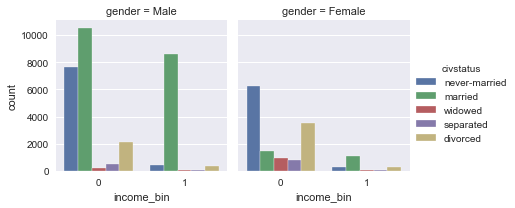

In [19]:
sns.catplot(data=df_recodificacion,kind='count', x="income_bin", hue="civstatus",col='gender',height=3)

**Podemos apreciar en este gráfico la afirmación de que sólo las personas casadas, para ambos generos son las que logran ingresos sobre 50k USD**

------------

**Podemos apreciar que la mayor cantidad de casos de la muestra, es en el sector privado (73,65%) y también el volúmen de casos:**

1. Private = 73%
2. Self-Employed = 12%
3. State-level-gov = 11%
4. Federal-gov = 3%

**Interesante caso a tener en consideración, que la proporción de casos del vector objetivo distribuye diferente, en donde apreciamos que la mayor proporción es en:** 
1. Federal-gov (39%)
2. Self-employed(36.2%)
3. State-level-gov (28.4%)
4. Sector privado (21.77%)

**Por lo que se puede inferir que si el Data Set fuera el universo muestral real, podríamos decir que el mejor sector para trabajar es en Federal-gov en donde el 40% de sus empleados ganan sobre 50K USD**

In [20]:
df1 = df_recodificacion['workclass_recod'].value_counts().rename_axis('unique_values').to_frame('count1')
df2_bin = df_recodificacion['workclass_recod'][df_recodificacion['income_bin']==1].value_counts().rename_axis('unique_values').to_frame('count2')
df3 = pd.DataFrame.merge(df1,df2_bin,how='inner',on='unique_values')
df3['percent'] = df3.apply(lambda x: round(100*x['count2']/x['count1'],2),1)
df3

,count1,count2,percent
unique_values,,,
private,33307,7251,21.77
self-employed,5442,1971,36.22
state-level-gov,5046,1435,28.44
federal-gov,1406,549,39.05
unemployed,21,2,9.52


In [21]:
df1_percent = df_recodificacion['workclass_recod'].value_counts('%').rename_axis('unique_values').to_frame('percent1')
df1_percent

,percent1
unique_values,
private,0.736522
self-employed,0.120340
state-level-gov,0.111583
federal-gov,0.031091
unemployed,0.000464


In [22]:
df1_percent = df_recodificacion['workclass_recod'][df_recodificacion['income_bin']==1].value_counts('%').rename_axis('unique_values').to_frame('percent1')
df1_percent

,percent1
unique_values,
private,0.646949
self-employed,0.175857
state-level-gov,0.128034
federal-gov,0.048983
unemployed,0.000178


-------

--------------

<AxesSubplot:>

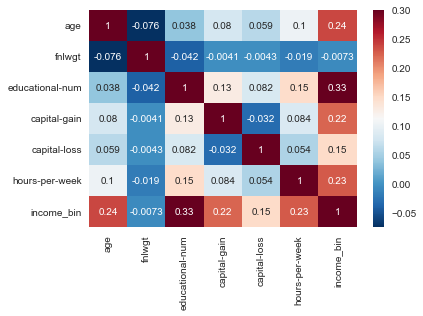

In [23]:
sns.heatmap(df_recodificacion.corr(), annot=True, vmax=.3,cmap = 'RdBu_r')

**Podemos observar correlaciones débiles, y un poco más fuertes en las conclusiones y observaciones ya vistas:**
* El nivel de ingreso se ve afectado en su mayoría por:
    1. El nivel educacional
    2. Edad
    3. Horas trabajadas
    4. Capital-Gain
* De forma más débil, podemos apreciar relación en:
    1. Horas trabajadas y nivel educacional
    2. Capital-Gain y nivel educacional

-----------

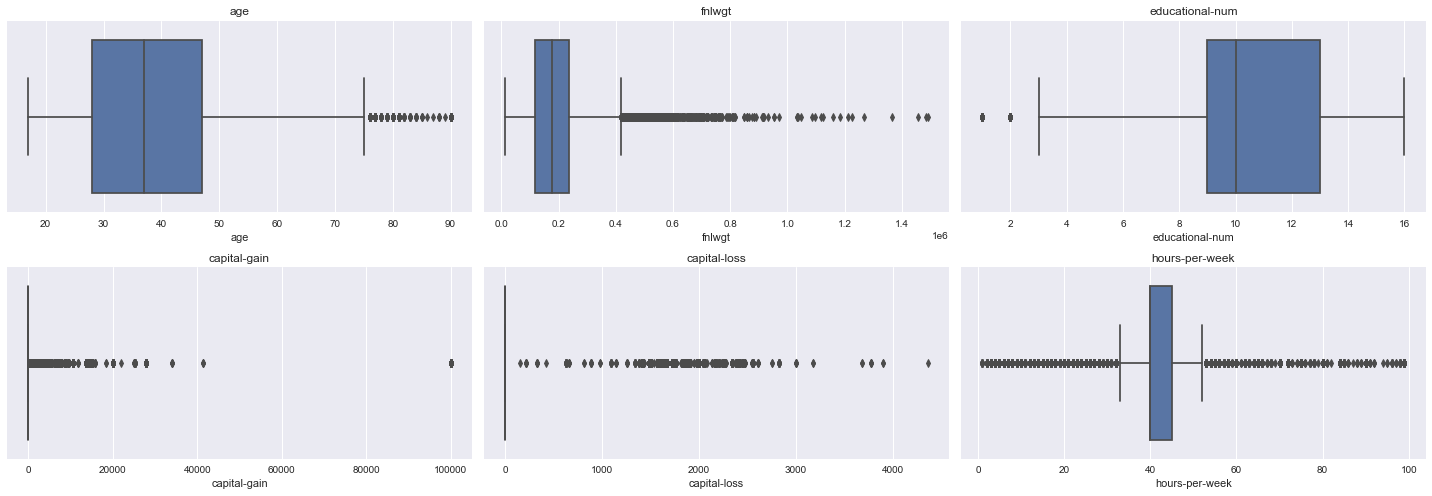

In [24]:
# Figura    
plt.figure(figsize = (20,10))
for i, column in enumerate(df_recodificacion.select_dtypes('int64').columns):
    plt.subplot(3,3,i+1)
    plt.title(column)
    #plt.text(1,1,str(values_N[i])+'%',ha='center',weight='bold',fontsize=0.1)
    sns.boxplot(df_recodificacion[column])
plt.tight_layout()

- En los datos númericos continuos:
    * Age, podemos observar cierta normalidad en sus datos
    * fnlwgt, al igual que en age podemos ver cierta normalidad en los datos
    * Encontramos gran variabilidad, en las variables capital-gain y capital-loss parecen estar concentradas en cero pero gracias al Boxplot podemos ver los outliers a lo largo de todo el eje.
    - La variable hours-per-week muestra una alta concentracion entorno a una media de 40 horas semanales, que se asemeja a una distribución normal. 
    - La variable educational-num muestra 3 tipos de modas, que son las mismas que en las variables categoricas por lo que podemos precindir de esta variable, dado que no tiene información relevante de forma continua y se exploró solamente para ver algun tipo de tendencia

### Procederemos a analizar el  vector objetivo en comparación con las demás variables.

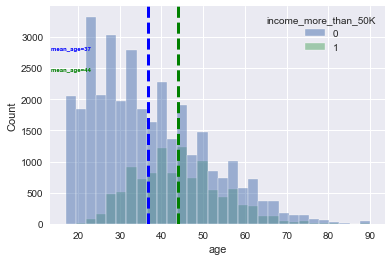

In [25]:
functions.grafico_hist(df_bin,'age','income_more_than_50K')

**Podemos observar interesantemente mayor normalidad para los datos de casos de USD sobre 50k, por lo que podemos inferir una función cuadratica en la edad con respecto al ingreso**

-----------

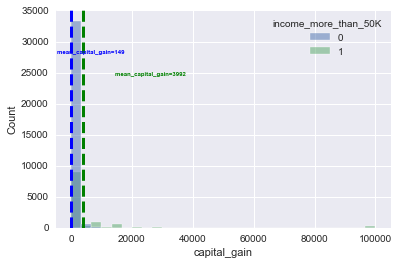

In [26]:
functions.grafico_hist(df_bin,'capital_gain','income_more_than_50K')

**Podemos observar que el capital Gain es solamente para casos positivos de nuestro vector objetivo y cerca de 27 veces más debido a casos extremos de esta variable. A pesar de que es un claro indicador de diferencia, la mayoría de los datos aún se conservan por debajo de 3992 por lo que hace falta un mayor estudio de esta variable.**

-----------

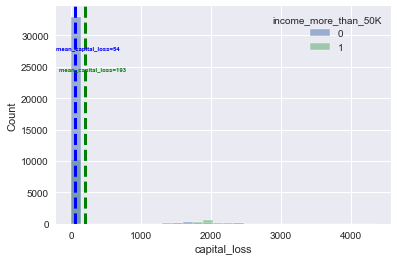

In [27]:
functions.grafico_hist(df_bin,'capital_loss','income_more_than_50K')

**Podemos observar de que a pesar de que nuestro vector objetivo es mayor en la variable, no es tan significativa la diferencia al compararlo con la variable anterior**

-----------

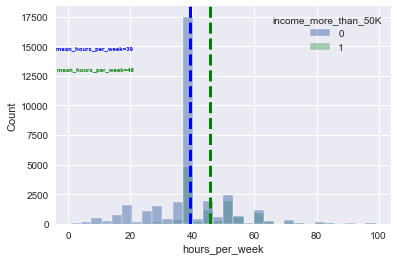

In [28]:
functions.grafico_hist(df_bin,'hours_per_week','income_more_than_50K')

**Podemos observar que en promedio, los casos de personas de la muestra que ganan sobre 50k USD, trabajan en promedio 7 horas más a la semana que los que no pero que la mayor proporcion aún se mantiene en 40 hrs.**

-----------

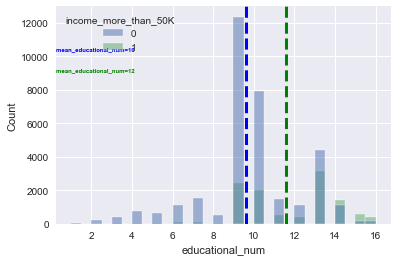

In [29]:
functions.grafico_hist(df_bin,'educational_num','income_more_than_50K')

**Podemos observar diferencias substanciales en el nivel educacional de nuestro vector objetivo, viendo anteriormente que la media ya mediana era 10, en este caso obtenemos 12, siendo interesante también observar que los casos más extremos de los casos con mayor nivel educativo en su mayoría son del vector objetivo, evidenciando una correlación positiva.**

-----------

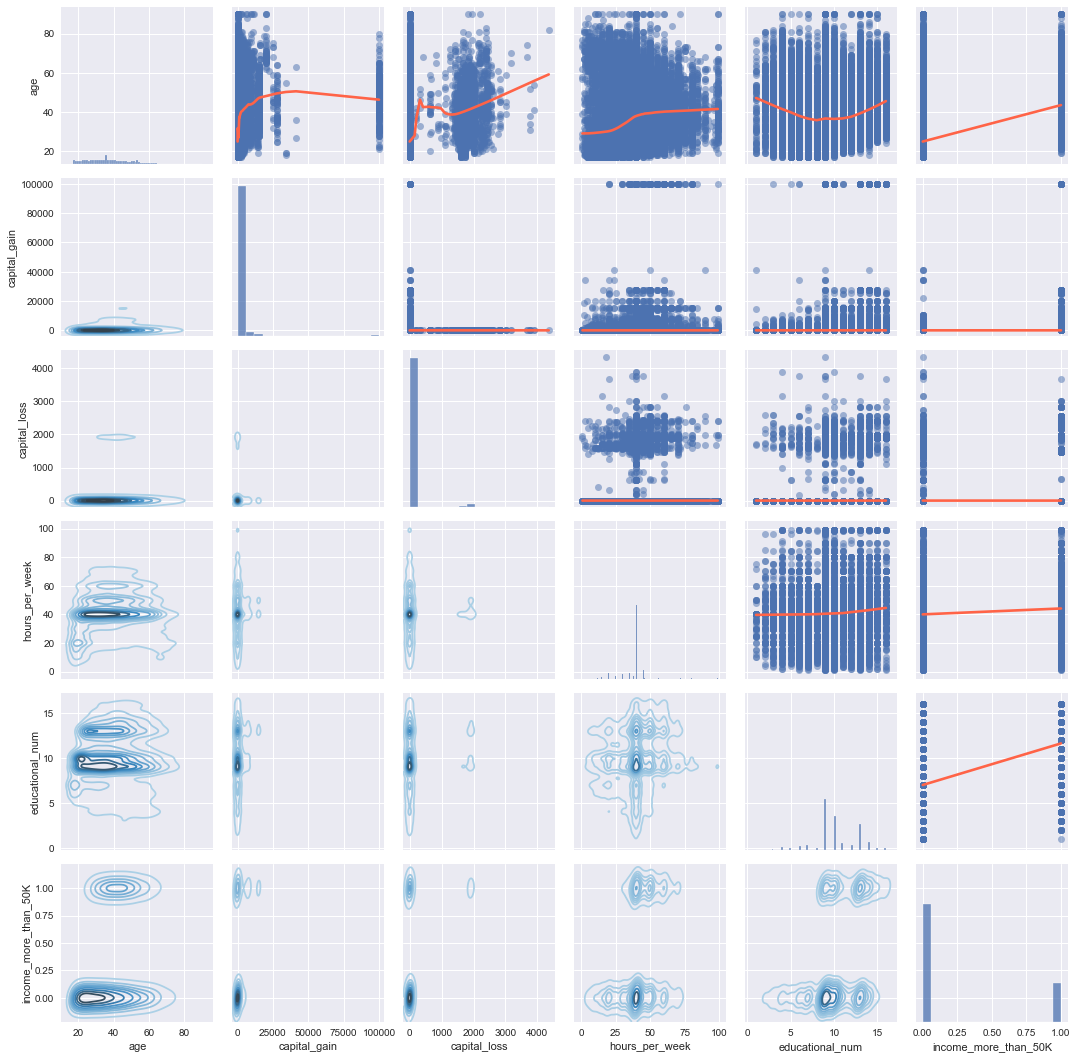

In [30]:
grid = sns.PairGrid(df_bin.loc[:,['age','capital_gain','capital_loss','hours_per_week','educational_num','income_more_than_50K']])
grid = grid.map_diag(sns.histplot)
grid = grid.map_upper(sns.regplot, lowess=True,scatter_kws={'alpha':.5},line_kws={'color':'tomato'})
grid = grid.map_lower(sns.kdeplot, cmap='Blues_d')

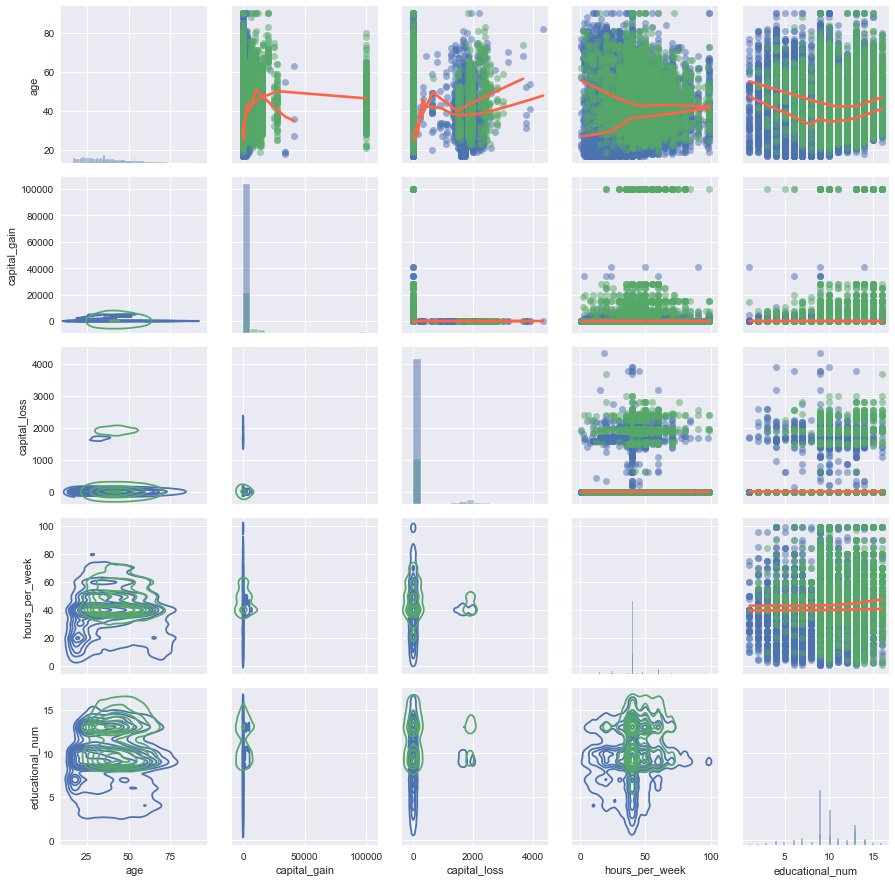

In [31]:
grid = sns.PairGrid(df_bin.loc[:,['age','capital_gain','capital_loss','hours_per_week','educational_num','income_more_than_50K']],hue='income_more_than_50K')
grid = grid.map_diag(sns.histplot)
grid = grid.map_upper(sns.regplot, lowess=True,scatter_kws={'alpha':.5},line_kws={'color':'tomato'})
grid = grid.map_lower(sns.kdeplot, cmap='Blues_d')

**Los siguientes gráficos, Diagonal: Histograma, Diagonal Superior: Regplot, Diagonal Inferior: Kdeplot. Nos ayudan a comprender de manera global la interacción de las variables continuas, evidenciando muchas de las observaciones antes señaladas pero agregando las otras relaciones de variables:**

* Age vs Capital Gain: Podemos observar que solo cierto rango acotado de edad obtiene capital gain, cerca de entre 25 y 60 años.
* Age vs Capital Loss: Podemos observar que cierto rango acotado de edad son los que obtienen la mayor pérdida, cercanos a 25 y 52 años.
* Educational_num: Podemos observar 2 grupos bien marcados de casos positivos de nuestro Vector Objetivo pero que se distribuye uniformemente en la edad.
    * Junto con hours per week, podemos observar que hay un pequeño grupo que trabaja menos que la media y  tiene un nivel educacional promedio en comparación al vector objetivo, también que en los grupos superiores e inferiores se evidencia similitud en la distribución de horas  trabajadas.
    * Junto con capital-loss, podemos observar que hay dos subgrupos distintos de 0, en donde se el capital loss es positivo.
        


## Hito 3:

Completar el punto de Modelación descriptiva.
* Elementos a considerar en éste hito:
    * La modelación mediante regresión de ambos problemas. (2 puntos)
    * La interpretación de los principales regresores en cada problema. (2 puntos)
    * La definición de las estrategias de Modelación predictiva. (1 punto)

**Excluiremos la columna fnlwgt: Ponderador muestral, dado que no aporta valor al modelo**

In [54]:
df_bin.drop(['fnlwgt'],axis=1,inplace=True)
df_norm.drop(['fnlwgt'],axis=1,inplace=True)

In [42]:
df_bin.head()

,age,educational_num,capital_gain,capital_loss,hours_per_week,relationship_Not_in_family,relationship_Other_relative,relationship_Own_child,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_Black,race_Other,race_White,gender_Male,income_more_than_50K,collars_others,collars_white_collar,workclass_recod_private,workclass_recod_self_employed,workclass_recod_state_level_gov,workclass_recod_unemployed,educ_recod_elementary_school,educ_recod_high_school,educ_recod_preschool,educ_recod_university,civstatus_married,civstatus_never_married,civstatus_separated,civstatus_widowed,region_asia,region_europa
0,25,7,0,0,40,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,38,9,0,0,50,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,28,12,0,0,40,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,44,10,7688,0,40,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,34,6,0,0,30,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [55]:
df_norm.head()

,age,educational_num,capital_gain,capital_loss,hours_per_week,relationship_Not_in_family,relationship_Other_relative,relationship_Own_child,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_Black,race_Other,race_White,gender_Male,income_more_than_50K,collars_others,collars_white_collar,workclass_recod_private,workclass_recod_self_employed,workclass_recod_state_level_gov,workclass_recod_unemployed,educ_recod_elementary_school,educ_recod_high_school,educ_recod_preschool,educ_recod_university,civstatus_married,civstatus_never_married,civstatus_separated,civstatus_widowed,region_asia,region_europa
0,-1.024972,-1.221545,-0.146732,-0.218778,-0.078119,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,-0.041455,-0.438117,-0.146732,-0.218778,0.754693,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,-0.798006,0.737026,-0.146732,-0.218778,-0.078119,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0.412476,-0.046402,0.877457,-0.218778,-0.078119,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,-0.344075,-1.613260,-0.146732,-0.218778,-0.910931,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


### Modelo descriptivo

In [64]:
modelo = smf.ols(f"income_more_than_50K ~ {' + '.join(df_norm.drop(['income_more_than_50K'], axis = 1).columns.tolist())}", df_norm).fit()
modelo.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                 OLS                     Adj. R-squared:        0.354     
Dependent Variable:    income_more_than_50K    AIC:                   32654.8540
Date:                  2022-09-25 19:16        BIC:                   32933.8728
No. Observations:      45222                   Log-Likelihood:        -16295.   
Df Model:              31                      F-statistic:           799.9     
Df Residuals:          45190                   Prob (F-statistic):    0.00      
R-squared:             0.354                   Scale:                 0.12045   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                        0.2436   0.0238  10.2460 0.0000  0.1970  0.2903
age                              0.0376   0.0021  18.0453 0.0000  0.0336  0.0417
educational_num                  0.0680   0.0039  17.3676 0.0000  0.0604  0.0757
capital_gain                     0.0617   0.0017  37.1093 0.0000  0.0585  0.0650
capital_loss                     0.0386   0.0016  23.4368 0.0000  0.0354  0.0418
hours_per_week                   0.0361   0.0018  20.2629 0.0000  0.0327  0.0396
relationship_Not_in_family      -0.2268   0.0127 -17.8855 0.0000 -0.2517 -0.2020
relationship_Other_relative     -0.1984   0.0144 -13.8101 0.0000 -0.2265 -0.1702
relationship_Own_child          -0.1976   0.0132 -14.9458 0.0000 -0.2235 -0.1717
relationship_Unmarried          -0.2176   0.0136 -16.0354 0.0000 -0.2442 -0.1910
relationship_Wife                0.1013   0.0093  10.9166 0.0000  0.0831  0.1195
race_Asian_Pac_Islander          0.0487   0.0222   2.1916 0.0284  0.0052  0.0923
race_Black                       0.0289   0.0175   1.6532 0.0983 -0.0054  0.0632
race_Other                       0.0187   0.0249   0.7509 0.4527 -0.0301  0.0676
race_White                       0.0470   0.0168   2.7980 0.0051  0.0141  0.0798
gender_Male                      0.0698   0.0049  14.3578 0.0000  0.0602  0.0793
collars_others                   0.0242   0.0060   4.0412 0.0001  0.0125  0.0360
collars_white_collar             0.0959   0.0042  22.7431 0.0000  0.0876  0.1042
workclass_recod_private         -0.0664   0.0096  -6.9449 0.0000 -0.0851 -0.0476
workclass_recod_self_employed   -0.1027   0.0105  -9.7852 0.0000 -0.1233 -0.0821
workclass_recod_state_level_gov -0.0854   0.0105  -8.1185 0.0000 -0.1060 -0.0648
workclass_recod_unemployed      -0.1791   0.0764  -2.3445 0.0191 -0.3288 -0.0294
educ_recod_elementary_school     0.0332   0.0181   1.8308 0.0671 -0.0023  0.0686
educ_recod_high_school          -0.0133   0.0051  -2.6238 0.0087 -0.0232 -0.0034
educ_recod_preschool             0.1225   0.0435   2.8186 0.0048  0.0373  0.2076
educ_recod_university            0.0751   0.0065  11.4585 0.0000  0.0622  0.0879
civstatus_married                0.0642   0.0128   4.9988 0.0000  0.0390  0.0894
civstatus_never_married         -0.0124   0.0061  -2.0328 0.0421 -0.0243 -0.0004
civstatus_separated              0.0177   0.0103   1.7206 0.0853 -0.0025  0.0379
civstatus_widowed                0.0167   0.0110   1.5217 0.1281 -0.0048  0.0383
region_asia                     -0.0436   0.0167  -2.6082 0.0091 -0.0763 -0.0108
region_europa                    0.0227   0.0129   1.7559 0.0791 -0.0026  0.0480
--------------------------------------------------------------------------------
Omnibus:                 2074.844           Durbin-Watson:              2.003   
Prob(Omnibus):           0.000              Jarque-Bera (JB):           2255.024
Skew:                    0.528              Prob(JB):                   0.000   
Kurtosis:                2.711              Condition No.:              92      
=======

#### Mejores variables descriptivas del modelo

In [111]:
mvd = modelo.summary2().tables[1]
mvd[mvd['P>|t|'] < 0.025].round(3).sort_values(by='P>|t|', ascending=True).reset_index()

,index,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
0,Intercept,0.244,0.024,10.246,0.000,0.197,0.290
1,workclass_recod_state_level_gov,-0.085,0.011,-8.119,0.000,-0.106,-0.065
2,workclass_recod_self_employed,-0.103,0.010,-9.785,0.000,-0.123,-0.082
3,workclass_recod_private,-0.066,0.010,-6.945,0.000,-0.085,-0.048
4,collars_white_collar,0.096,0.004,22.743,0.000,0.088,0.104
5,collars_others,0.024,0.006,4.041,0.000,0.012,0.036
6,gender_Male,0.070,0.005,14.358,0.000,0.060,0.079
7,civstatus_married,0.064,0.013,4.999,0.000,0.039,0.089
8,relationship_Wife,0.101,0.009,10.917,0.000,0.083,0.119
9,relationship_Unmarried,-0.218,0.014,-16.035,0.000,-0.244,-0.191


#### Primera Iteración

- A continuación depuraremos el modelo, dejando solo aquellos regresores con un pvalue menor o igual a .05

In [112]:
depuracion = modelo.pvalues[(modelo.pvalues <= 0.025) & (modelo.pvalues.index != 'Intercept')].index.tolist()
modelo_dep = smf.ols(f"income_more_than_50K ~ {' + '.join(depuracion)}", df_bin).fit()
modelo_dep.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                 OLS                     Adj. R-squared:        0.354     
Dependent Variable:    income_more_than_50K    AIC:                   32663.9267
Date:                  2022-09-25 22:21        BIC:                   32873.1909
No. Observations:      45222                   Log-Likelihood:        -16308.   
Df Model:              23                      F-statistic:           1077.     
Df Residuals:          45198                   Prob (F-statistic):    0.00      
R-squared:             0.354                   Scale:                 0.12050   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                       -0.2441   0.0227 -10.7757 0.0000 -0.2885 -0.1997
age                              0.0031   0.0001  21.4773 0.0000  0.0028  0.0033
educational_num                  0.0249   0.0012  21.0142 0.0000  0.0225  0.0272
capital_gain                     0.0000   0.0000  37.1542 0.0000  0.0000  0.0000
capital_loss                     0.0001   0.0000  23.4671 0.0000  0.0001  0.0001
hours_per_week                   0.0030   0.0001  20.4848 0.0000  0.0027  0.0033
relationship_Not_in_family      -0.2257   0.0127 -17.8170 0.0000 -0.2505 -0.2008
relationship_Other_relative     -0.1973   0.0143 -13.7580 0.0000 -0.2254 -0.1692
relationship_Own_child          -0.1995   0.0132 -15.1241 0.0000 -0.2254 -0.1737
relationship_Unmarried          -0.2116   0.0135 -15.7323 0.0000 -0.2380 -0.1852
relationship_Wife                0.1005   0.0093  10.8392 0.0000  0.0823  0.1187
race_White                       0.0194   0.0051   3.8009 0.0001  0.0094  0.0294
gender_Male                      0.0680   0.0048  14.0950 0.0000  0.0585  0.0775
collars_others                   0.0241   0.0060   4.0253 0.0001  0.0124  0.0359
collars_white_collar             0.0955   0.0042  22.6556 0.0000  0.0872  0.1037
workclass_recod_private         -0.0657   0.0096  -6.8796 0.0000 -0.0845 -0.0470
workclass_recod_self_employed   -0.1025   0.0105  -9.7636 0.0000 -0.1230 -0.0819
workclass_recod_state_level_gov -0.0850   0.0105  -8.0819 0.0000 -0.1056 -0.0644
workclass_recod_unemployed      -0.1808   0.0764  -2.3663 0.0180 -0.3305 -0.0310
educ_recod_high_school          -0.0178   0.0044  -4.0732 0.0000 -0.0263 -0.0092
educ_recod_preschool             0.1015   0.0423   2.3972 0.0165  0.0185  0.1845
educ_recod_university            0.0791   0.0060  13.0953 0.0000  0.0673  0.0909
civstatus_married                0.0704   0.0121   5.7932 0.0000  0.0466  0.0942
region_asia                     -0.0258   0.0117  -2.2001 0.0278 -0.0487 -0.0028
--------------------------------------------------------------------------------
Omnibus:                 2073.585           Durbin-Watson:              2.003   
Prob(Omnibus):           0.000              Jarque-Bera (JB):           2255.835
Skew:                    0.528              Prob(JB):                   0.000   
Kurtosis:                2.713              Condition No.:              355241  
================================================================================
* The condition number is large (4e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

#### Mejores predictores primera iteración

In [113]:
x1 = pd.read_html(modelo_dep.summary().tables[1].as_html())[0].iloc[1:, [0,1,4]]
x1.columns = ['regresor', 'coef', 'pval']
x1['pval'] = pd.to_numeric(x1['pval'])
x1['coef'] = pd.to_numeric(x1['coef'])
x1_trust = x1[x1['pval'] <= 0.05].sort_values(by = 'pval').reset_index()
print("A continuación los mejores predictores")
x1_trust

A continuación los mejores predictores


,index,regresor,coef,pval
0,1,Intercept,-0.244100,0.000
1,22,educ_recod_university,0.079100,0.000
2,20,educ_recod_high_school,-0.017800,0.000
3,18,workclass_recod_state_level_gov,-0.085000,0.000
4,17,workclass_recod_self_employed,-0.102500,0.000
5,16,workclass_recod_private,-0.065700,0.000
6,15,collars_white_collar,0.095500,0.000
7,14,collars_others,0.024100,0.000
8,13,gender_Male,0.068000,0.000
9,23,civstatus_married,0.070400,0.000


#### Segunda Iteración

In [114]:
depuracion2 = modelo_dep.pvalues[(modelo_dep.pvalues <= 0.025) & (modelo_dep.pvalues.index != 'Intercept')].index.tolist()
modelo_dep2 = smf.ols(f"income_more_than_50K ~ {' + '.join(depuracion2)}", df_bin).fit()
modelo_dep2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                 OLS                     Adj. R-squared:        0.354     
Dependent Variable:    income_more_than_50K    AIC:                   32666.7694
Date:                  2022-09-25 22:21        BIC:                   32867.3142
No. Observations:      45222                   Log-Likelihood:        -16310.   
Df Model:              22                      F-statistic:           1125.     
Df Residuals:          45199                   Prob (F-statistic):    0.00      
R-squared:             0.354                   Scale:                 0.12051   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                       -0.2455   0.0226 -10.8428 0.0000 -0.2899 -0.2011
age                              0.0031   0.0001  21.4979 0.0000  0.0028  0.0034
educational_num                  0.0248   0.0012  20.9851 0.0000  0.0225  0.0271
capital_gain                     0.0000   0.0000  37.1583 0.0000  0.0000  0.0000
capital_loss                     0.0001   0.0000  23.4554 0.0000  0.0001  0.0001
hours_per_week                   0.0030   0.0001  20.4969 0.0000  0.0027  0.0033
relationship_Not_in_family      -0.2269   0.0127 -17.9328 0.0000 -0.2517 -0.2021
relationship_Other_relative     -0.1991   0.0143 -13.9022 0.0000 -0.2271 -0.1710
relationship_Own_child          -0.2008   0.0132 -15.2306 0.0000 -0.2266 -0.1749
relationship_Unmarried          -0.2126   0.0134 -15.8116 0.0000 -0.2389 -0.1862
relationship_Wife                0.1004   0.0093  10.8214 0.0000  0.0822  0.1185
race_White                       0.0232   0.0048   4.8225 0.0000  0.0138  0.0326
gender_Male                      0.0678   0.0048  14.0514 0.0000  0.0583  0.0772
collars_others                   0.0239   0.0060   3.9876 0.0001  0.0122  0.0357
collars_white_collar             0.0953   0.0042  22.6214 0.0000  0.0871  0.1036
workclass_recod_private         -0.0662   0.0096  -6.9337 0.0000 -0.0850 -0.0475
workclass_recod_self_employed   -0.1031   0.0105  -9.8282 0.0000 -0.1237 -0.0825
workclass_recod_state_level_gov -0.0850   0.0105  -8.0843 0.0000 -0.1056 -0.0644
workclass_recod_unemployed      -0.1821   0.0764  -2.3839 0.0171 -0.3319 -0.0324
educ_recod_high_school          -0.0177   0.0044  -4.0500 0.0001 -0.0262 -0.0091
educ_recod_preschool             0.0994   0.0423   2.3481 0.0189  0.0164  0.1824
educ_recod_university            0.0785   0.0060  13.0049 0.0000  0.0666  0.0903
civstatus_married                0.0688   0.0121   5.6739 0.0000  0.0450  0.0926
--------------------------------------------------------------------------------
Omnibus:                 2072.234           Durbin-Watson:              2.003   
Prob(Omnibus):           0.000              Jarque-Bera (JB):           2253.105
Skew:                    0.527              Prob(JB):                   0.000   
Kurtosis:                2.712              Condition No.:              355230  
================================================================================
* The condition number is large (4e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

* **Podemos observar que no hubo baja de Adj. R-squared = 35.4% al eliminar la variable independiente de **

* Esta métrica no es relevante puesto que solo nos dice sobre el ajuste a los datos y no su capacidad para predecir datos.

* Lo que nos interesa para el proximo hito es conocer la tasa de clases que un modelo de regresión logística de scikit learn puede predecir
de manera correcta (probabilidad de clase).


### Método de mínimos cuadrados (logit) para variable dependiente

In [115]:
modelo_logit = smf.logit(f" income_more_than_50K ~ {' + '.join(df_norm.drop(['income_more_than_50K'], axis = 1).columns.tolist())}", df_norm).fit()
modelo_logit.summary2()


Optimization terminated successfully.
         Current function value: 0.331949
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                  Logit                    Pseudo R-squared:     0.407     
Dependent Variable:     income_more_than_50K     AIC:                  30086.7585
Date:                   2022-09-25 22:21         BIC:                  30365.7774
No. Observations:       45222                    Log-Likelihood:       -15011.   
Df Model:               31                       LL-Null:              -25322.   
Df Residuals:           45190                    LLR p-value:          0.0000    
Converged:              1.0000                   Scale:                1.0000    
No. Iterations:         11.0000                                                  
---------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
---------------------------------------------------------------------------------
Intercept                       -2.2877   0.2466  -9.2756 0.0000  -2.7711 -1.8043
age                              0.3283   0.0178  18.3994 0.0000   0.2933  0.3632
educational_num                  0.7047   0.0409  17.2099 0.0000   0.6245  0.7850
capital_gain                     2.3838   0.0646  36.9148 0.0000   2.2573  2.5104
capital_loss                     0.2653   0.0124  21.3129 0.0000   0.2409  0.2897
hours_per_week                   0.3539   0.0158  22.3537 0.0000   0.3229  0.3849
relationship_Not_in_family      -0.9533   0.1338  -7.1229 0.0000  -1.2156 -0.6910
relationship_Other_relative     -1.4149   0.1873  -7.5532 0.0000  -1.7820 -1.0477
relationship_Own_child          -1.9407   0.1664 -11.6627 0.0000  -2.2669 -1.6146
relationship_Unmarried          -1.1865   0.1504  -7.8895 0.0000  -1.4812 -0.8917
relationship_Wife                1.0598   0.0841  12.6067 0.0000   0.8951  1.2246
race_Asian_Pac_Islander          0.8158   0.2230   3.6581 0.0003   0.3787  1.2528
race_Black                       0.3487   0.1883   1.8517 0.0641  -0.0204  0.7177
race_Other                       0.2894   0.2719   1.0645 0.2871  -0.2435  0.8223
race_White                       0.5534   0.1794   3.0849 0.0020   0.2018  0.9050
gender_Male                      0.7895   0.0642  12.2951 0.0000   0.6636  0.9153
collars_others                  -0.7320   0.0869  -8.4255 0.0000  -0.9023 -0.5617
collars_white_collar             0.6034   0.0353  17.0697 0.0000   0.5341  0.6727
workclass_recod_private         -0.4397   0.0749  -5.8673 0.0000  -0.5866 -0.2928
workclass_recod_self_employed   -0.7889   0.0820  -9.6155 0.0000  -0.9496 -0.6281
workclass_recod_state_level_gov -0.5151   0.0837  -6.1561 0.0000  -0.6791 -0.3511
workclass_recod_unemployed      -1.5402   0.8043  -1.9150 0.0555  -3.1166  0.0361
educ_recod_elementary_school     0.1703   0.2374   0.7173 0.4732  -0.2950  0.6355
educ_recod_high_school          -0.0659   0.0467  -1.4112 0.1582  -0.1575  0.0256
educ_recod_preschool            -3.9643   4.0826  -0.9710 0.3315 -11.9662  4.0375
educ_recod_university            0.0888   0.0608   1.4597 0.1444  -0.0304  0.2079
civstatus_married                0.8088   0.1383   5.8479 0.0000   0.5377  1.0799
civstatus_never_married         -0.4842   0.0722  -6.7064 0.0000  -0.6257 -0.3427
civstatus_separated             -0.0202   0.1329  -0.1516 0.8795  -0.2807  0.2404
civstatus_widowed                0.0903   0.1279   0.7061 0.4801  -0.1604  0.3411
region_asia                     -0.4915   0.1498  -3.2810 0.0010  -0.7852 -0.1979
region_europa                    0.2009   0.1056   1.9022 0.0571  -0.0061  0.4078
=================================================================================

"""

In [116]:
depuracion_logit = modelo_logit.pvalues[modelo_logit.pvalues <= .025].drop('Intercept').index.tolist()
modelo_logit_dep = smf.logit(f"income_more_than_50K ~ {' + '.join(depuracion_logit)}", df_norm).fit()

print("Para que el modelo tenga certeza de un 95% se debe cumplie P-value <= 0.05, por lo que todas las variables mayores al 5% que quedan son:")                                                  
modelo_logit_dep.summary()

Optimization terminated successfully.
         Current function value: 0.332184
         Iterations 9
Para que el modelo tenga certeza de un 95% se debe cumplie P-value <= 0.05, por lo que todas las variables mayores al 5% que quedan son:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     income_more_than_50K   No. Observations:                45222
Model:                            Logit   Df Residuals:                    45200
Method:                             MLE   Df Model:                           21
Date:                  Sun, 25 Sep 2022   Pseudo R-squ.:                  0.4068
Time:                          22:21:55   Log-Likelihood:                -15022.
converged:                         True   LL-Null:                       -25322.
Covariance Type:              nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.0052      0.174    -11.506      0.000      -2.347      -1.664
age                                 0.3310      0.018     18.814      0.000       0.297       0.366
educational_num                     0.7643      0.019     41.149      0.000       0.728       0.801
capital_gain                        2.3813      0.064     36.922      0.000       2.255       2.508
capital_loss                        0.2655      0.012     21.328      0.000       0.241       0.290
hours_per_week                      0.3534      0.016     22.332      0.000       0.322       0.384
relationship_Not_in_family         -0.9503      0.134     -7.116      0.000      -1.212      -0.689
relationship_Other_relative        -1.4115      0.187     -7.531      0.000      -1.779      -1.044
relationship_Own_child             -1.9428      0.166    -11.703      0.000      -2.268      -1.617
relationship_Unmarried             -1.1832      0.150     -7.886      0.000      -1.477      -0.889
relationship_Wife                   1.0502      0.084     12.544      0.000       0.886       1.214
race_Asian_Pac_Islander             0.5104      0.144      3.552      0.000       0.229       0.792
race_White                          0.2456      0.057      4.288      0.000       0.133       0.358
gender_Male                         0.7846      0.064     12.308      0.000       0.660       0.910
collars_others                     -0.7252      0.087     -8.350      0.000      -0.895      -0.555
collars_white_collar                0.6130      0.035     17.501      0.000       0.544       0.682
workclass_recod_private            -0.4178      0.074     -5.620      0.000      -0.563      -0.272
workclass_recod_self_employed      -0.7682      0.081     -9.431      0.000      -0.928      -0.609
workclass_recod_state_level_gov    -0.4937      0.083     -5.942      0.000      -0.657      -0.331
civstatus_married                   0.8055      0.136      5.932      0.000       0.539       1.072
civstatus_never_married            -0.4832      0.068     -7.069      0.000      -0.617      -0.349
region_asia                        -0.4961      0.149     -3.323      0.001      -0.789      -0.204
===================================================================================================
"""

La verosimilitud es mejor en el modelo depurado pasando de un Log-Likelihood -15022 a -15011, optimizando este. La relación entre el vector objetivo y el resto de las variables es de pendiente negativa.

La comparación de ambas iteraciones nos da como resultado una mínima baja de pseudo r2, esto no es relevante ya que solo nos proporciona información sobre el ajuste a los datos y no de su capacidad predictiva.

## Hito 4

Para el siguiente hito, queremos conocer el poder predictivo de un modelo de regresión logística (utilizando las librerias de scikit learn).

Siguientes pasos:
- Separaremos nuestra base en muestras de entrenamiento y testing.
- Entrenaremos un modelo de regresion logistica para predecir la probabilidad de income_more_than_50K.
- Estandarizar los datos utilizando standar scaler.
- Utilizar el método de validación cruzada.
- Debido a la gran cantidad de datos, descartaremos el uso de leaveOneOut por temas de costos.

Modelo 1 (Con intercepto, separando un 30% de la muestra, usando una semilla = 5678 y utilizando el modelo depurado (depuracion_logit))

In [117]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    df_norm.loc[:,depuracion_logit]
    ,df_norm.loc[:,'income_more_than_50K']
    ,test_size=.3
    ,random_state=4567)

### Estandarización de la matriz de entrenamiento

In [118]:
X1_train_std = StandardScaler().fit_transform(X1_train)

### Estandarización de la matriz de validación

In [119]:
X1_test_std = StandardScaler().fit_transform(X1_test)

In [120]:
default_m1 = LogisticRegression(fit_intercept=True).fit(X1_train_std, y1_train)
default_m1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Obtenemos los coeficientes

In [121]:
default_m1.coef_

array([[ 0.32766933,  0.75925649,  2.3505739 ,  0.27250819,  0.3385862 ,
        -0.41966433, -0.25257304, -0.70382149, -0.34471171,  0.2216512 ,
         0.10667076,  0.08128158,  0.36478009, -0.22018169,  0.30544703,
        -0.17724765, -0.25080945, -0.15919444,  0.42770132, -0.19309686,
        -0.09572435]])

### Predicciones de Clases 

In [122]:
yhat_class1 = default_m1.predict(X1_test_std)
yhat_class1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

#### Predicciones de probabilidad continua

In [123]:
yhat_pr1 = default_m1.predict_proba(X1_test_std)[:,1]
yhat_pr1[:10]

array([0.01627035, 0.01358618, 0.00537969, 0.21223541, 0.45705631,
       0.2123993 , 0.39881639, 0.06657578, 0.00628779, 0.87192529])

In [124]:
y1_pred = yhat_class1
print(confusion_matrix(y1_test,y1_pred))
print(f"\nEl modelo presenta un porcentaje de:\n\nExactitud: {round(accuracy_score(y1_test,y1_pred)*100,1)} %\nPrecision: ", round(precision_score(y1_test, y1_pred)*100,2),"%", "\nRecall: ", round(recall_score(y1_test, y1_pred)*100,2),"%")

[[9462  751]
 [1344 2010]]

El modelo presenta un porcentaje de:

Exactitud: 84.6 %
Precision:  72.8 % 
Recall:  59.93 %


* Verdaderos Positivos: El modelo presenta 2010 predicciones correctas indicando income > 50k
* Verdaderos Negativos: El modelo presenta 9362 predicciones correctas indicando income < 50k
* Falsos Positivos: El modelo hizo 751 predicciones incorrectas de income < 50k
* Falsos Negativos: El modelo hizo 1344 predicciones incorrectas de income > 50k

Si bien el modelo no presenta tanta precisión para establecer Verdaderos Positivos, si es muy bueno entendiendo los Verdaderos Negativos. Habría que entrenar un nuevo modelo con una mayor cantidad de valores de income > 50k.
Otra observación importante esque este modelo no es tan malo para este propósito pero si sería distinto si por ejemplo intentamos predecir variables más sensibles como enfermedades terminales, algún tipo de cance o algo que afecte criticamente a una persona.

In [125]:
print(classification_report(y1_test, y1_pred))
print("Finalmente, debido a que nuestro modelo y1 > 50% podemos concluir que clasifica correctamente los casos, por lo que sugiere que este no debe ser refactorizado")

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10213
           1       0.73      0.60      0.66      3354

   micro avg       0.85      0.85      0.85     13567
   macro avg       0.80      0.76      0.78     13567
weighted avg       0.84      0.85      0.84     13567

Finalmente, debido a que nuestro modelo y1 > 50% podemos concluir que clasifica correctamente los casos, por lo que sugiere que este no debe ser refactorizado


### Curva Receiver Operator Characteristic (ROC)

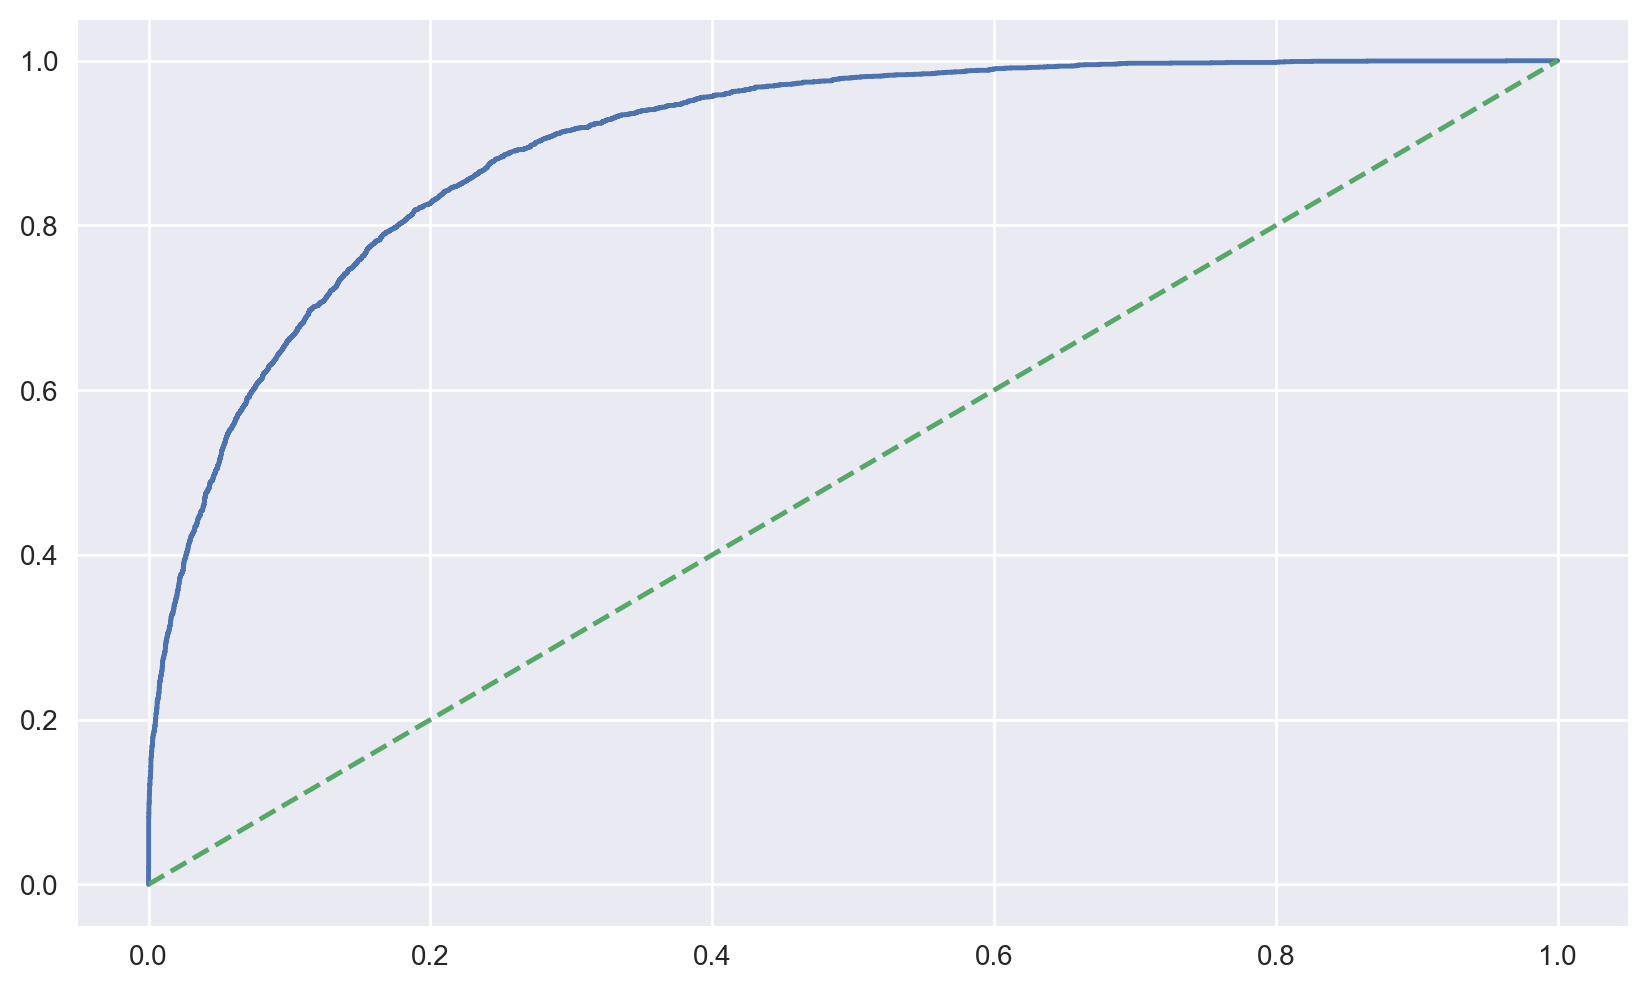

In [126]:
false_positive, true_positive, thres =  roc_curve(y1_test,yhat_pr1)
plt.plot(false_positive,true_positive)
plt.plot([0,1],ls='--')

In [127]:
round(roc_auc_score(y1_test,yhat_pr1),2)
print(f"Con un valor de 90%, nuestro modelo tiene un desempeyo de {(0.9-0.5)*100}% superior a un mecanismo de clasificación aleatoria")

Con un valor de 90%, nuestro modelo tiene un desempeyo de 40.0% superior a un mecanismo de clasificación aleatoria


In [128]:
errores_pred = pd.DataFrame({"y_test": y1_test.values,
                            "y_hat": y1_pred})
errores_pred["y_test - y_hat"] = errores_pred['y_test'] - errores_pred['y_hat']
errores_pred.head()

,y_test,y_hat,y_test - y_hat
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,1
4,0,0,0


### Error cuadratico medio

In [129]:
mean_squared_error(y1_test, y1_pred)

0.15441881034864008